In [1]:
%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

import sys
import numpy as np
import pandas as pd
import datetime

from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Variables with the names of each column in data
cdphid_column                 = 'CDPHId'
productname_column            = 'ProductName'
csfid_column                  = 'CSFId'
csf_column                    = 'CSF'
companyid_column              = 'CompanyId'
companyname_column            = 'CompanyName'
brandname_column              = 'BrandName'
primarycategoryid_column      = 'PrimaryCategoryId'
primarycategory_column        = 'PrimaryCategory'
subcategoryid_column          = 'SubCategoryId'
subcategory_column            = 'SubCategory'
casid_column                  = 'CasId'
casnumber_column              = 'CasNumber'
chemicalid_column             = 'ChemicalId'
chemicalname_column           = 'ChemicalName'
initialdatereported_column    = 'InitialDateReported'
mostrecentdatereported_column = 'MostRecentDateReported'
discontinueddate_column       = 'DiscontinuedDate'
chemicalcreatedat_column      = 'ChemicalCreatedAt'
chemicalupdatedat_column      = 'ChemicalUpdatedAt'
chemicaldateremoved_column    = 'ChemicalDateRemoved'
chemicalcount_column          = 'ChemicalCount'

In [3]:
# List of columns which contains a Names
list_names = [ productname_column, csf_column, companyname_column, brandname_column, 
               primarycategory_column, subcategory_column, chemicalname_column ]

# List of columns which contains a Dates
list_dates = [ initialdatereported_column, mostrecentdatereported_column, discontinueddate_column,
               chemicalcreatedat_column, chemicalupdatedat_column, chemicaldateremoved_column ]

# Other columns
list_ids = [ cdphid_column, csfid_column, companyid_column, primarycategoryid_column, 
             subcategoryid_column, casid_column, chemicalid_column ]

# Date value which means NaT 
nat_date = datetime.date(1900,1,1)

In [4]:
# Load data from data/ folder
data = pd.read_csv('data/cscpopendata.csv', sep = ',', parse_dates = list_dates)

# pd.isna() --> for NaN
# <value> is pd.NaT --> for NaT

# Fill NaT with 01/01/2500
for date_column in list_dates :
    data[date_column] = data[date_column].apply(lambda x: nat_date if x is pd.NaT else x)
    

# Fill NA with ''
data = data.fillna('')
data.head()

,CDPHId,ProductName,CSFId,CSF,CompanyId,CompanyName,BrandName,PrimaryCategoryId,PrimaryCategory,SubCategoryId,...,CasNumber,ChemicalId,ChemicalName,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,ChemicalCount
0,2,ULTRA COLOR RICH EXTRA PLUMP LIPSTICK-ALL SHADES,,,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),53,...,13463-67-7,6,Titanium dioxide,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,1900-01-01,1
1,3,Glover's Medicated Shampoo,,,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,65996-92-1,4,Distillates (coal tar),2009-07-01,2009-07-01,1900-01-01,2009-07-01,2009-07-01,1900-01-01,2
2,3,Glover's Medicated Shampoo,,,338,J. Strickland & Co.,Glover's,18,Hair Care Products (non-coloring),25,...,140-67-0,5,Estragole,2009-07-01,2009-07-01,1900-01-01,2009-07-02,2009-07-02,1900-01-01,2
3,4,PRECISION GLIMMER EYE LINER-ALL SHADES �,,,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),46,...,13463-67-7,7,Titanium dioxide,2009-07-09,2013-08-28,1900-01-01,2009-07-09,2009-07-09,1900-01-01,1
4,5,AVON BRILLIANT SHINE LIP GLOSS-ALL SHADES �,,,4,New Avon LLC,AVON,44,Makeup Products (non-permanent),52,...,13463-67-7,8,Titanium dioxide,2009-07-09,2013-08-28,2011-02-01,2009-07-09,2009-07-09,1900-01-01,1


In [5]:
# Add to 'data' a column for each 'date_column' in 'list_dates' with the year and month of each date 
list_dates_extended = list_dates.copy()

for date_column in list_dates :
    data[date_column + '_Year'] = data[date_column].apply(lambda x: x.year)
    data[date_column + '_Month'] = data[date_column].apply(lambda x: x.month)
    
    list_dates_extended.append(date_column + '_Year')
    list_dates_extended.append(date_column + '_Month')

# Create a data_aggregate with the sum of 'chemicalcount_column' of the following columns:
# 'list_dates', 'casid_column' and 'subcategoryid_column'
data_aggregated = pd.DataFrame(data.groupby(list_dates_extended + [casid_column] + [subcategoryid_column], as_index = False)
                               .agg({chemicalcount_column : 'sum'}))
data_aggregated.head()

,InitialDateReported,MostRecentDateReported,DiscontinuedDate,ChemicalCreatedAt,ChemicalUpdatedAt,ChemicalDateRemoved,InitialDateReported_Year,InitialDateReported_Month,MostRecentDateReported_Year,MostRecentDateReported_Month,...,DiscontinuedDate_Month,ChemicalCreatedAt_Year,ChemicalCreatedAt_Month,ChemicalUpdatedAt_Year,ChemicalUpdatedAt_Month,ChemicalDateRemoved_Year,ChemicalDateRemoved_Month,CasId,SubCategoryId,ChemicalCount
0,2009-06-17,2013-08-28,2011-02-01,2009-07-09,2009-07-09,1900-01-01,2009,6,2013,8,...,2,2009,7,2009,7,1900,1,656,53,1
1,2009-07-01,2009-07-01,1900-01-01,2009-07-01,2009-07-01,1900-01-01,2009,7,2009,7,...,1,2009,7,2009,7,1900,1,889,25,2
2,2009-07-01,2009-07-01,1900-01-01,2009-07-02,2009-07-02,1900-01-01,2009,7,2009,7,...,1,2009,7,2009,7,1900,1,293,25,2
3,2009-07-09,2013-08-28,1900-01-01,2009-07-09,2009-07-09,1900-01-01,2009,7,2013,8,...,1,2009,7,2009,7,1900,1,656,46,1
4,2009-07-09,2013-08-28,2010-11-01,2009-07-09,2009-07-09,1900-01-01,2009,7,2013,8,...,11,2009,7,2009,7,1900,1,656,48,1


In [6]:
def dates_to_clustering(data, date_columns) :
    """
    Convert the columns with date values to timestamp values.
    
    Params:
    data -- data whose columns will be converted.
    date_columns -- list which contains the columns with date values.
    
    Return:
    A data copy with the date columns converted to timestamp.
    """
    
    to_clustering = data.copy(deep = True)
    
    for col in date_columns :
        to_clustering[col] = data[col].apply(lambda x: x.timestamp())
        
    return to_clustering


def clustering_to_dates(data, date_columns) :
    """
    Convert the columns with timestamp values to date values.
    
    Params:
    data -- data whose columns will be converted.
    date_columns -- list which contains the columns with timestamp values.
    
    Return:
    A data copy with the date columns converted to date.
    """
        
    to_dates = data.copy(deep = True)
    
    for col in date_columns :
        to_dates[col] = data[col].apply(lambda x: datetime.date.fromtimestamp(x))
        
    return to_dates


def get_n_clusters(data, max_k = 10, n_init = 10, plot_graph = False) :
    """
    Get the number of cluster to apply KMeans using the Silhouette coeffiecient.
    
    The Silhouette coefficient is defined like the difference between mean distance to closest 
    cluster's elements and mean intra-cluster distance of the cluster's element divide by the maximum of them.
    
    The Silhouette coefficient is implemented in sklearn.metrics with the silhouette_score() method.
    
    Params:
    data        -- data to get the number of clusters.
    max_k       -- maximun of clusters to apply the Silhouette coefficient. It have to be higher than 2.
    n_init      -- maximum number which the algorithm will be executed.
    plot_graph  -- boolean to plot the results of execution.
    
    Returns:
    Number of clusters to apply KMeans
    """
    
    from sklearn.metrics import silhouette_score
    from sklearn.cluster import KMeans
    
    min_k = 2
    silhouette_avgs = []
    max_score = -1
    n_clusters = min_k
    
    for k in range(min_k, max_k):
        kmean = KMeans(n_clusters = k, n_init = n_init).fit(data)
        score = silhouette_score(data, kmean.labels_)
        silhouette_avgs.append(score)
        
        if score > max_score :
            max_score = score
            n_clusters = k
    
    if plot_graph :
        plot(range(min_k, max_k), silhouette_avgs)
        xlabel('k')
        ylabel('silhouette coefficient')
    
    return n_clusters

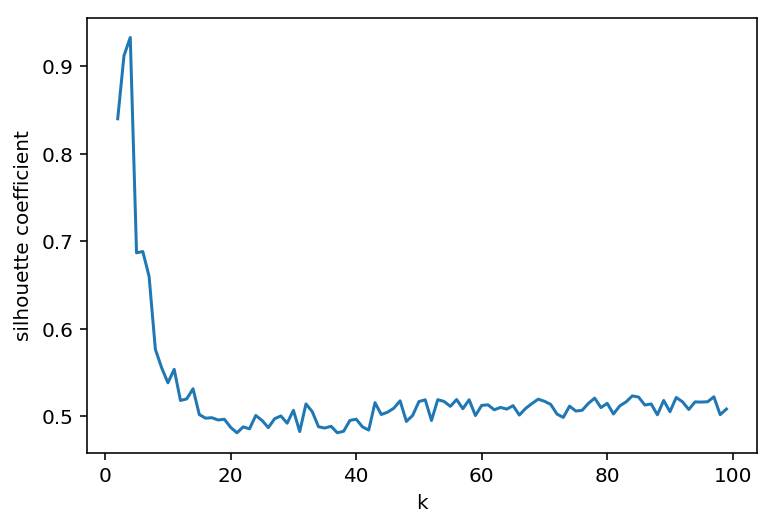

In [23]:
clustering_data = dates_to_clustering(data_aggregated, list_dates)

max_k = 10
n_init = 10

n_clusters = get_n_clusters(clustering_data, max_k = max_k, 
                            n_init = n_init, plot_graph = True)

In [18]:
kmeans = KMeans(n_clusters = n_clusters, 
                n_init = n_init, 
                random_state = 1).fit(clustering_data)

In [19]:
clusters = kmeans.predict(clustering_data[[casid_column, subcategoryid_column]])

# Print the cluster of each chemical
for c in range(max(clusters) + 1) :
    print('Cluster', c)
    
    for casid in unique(clustering_data[casid_column][clusters == c]) :
        print(str(casid) + " - " + unique(data[chemicalname_column][data[casid_column] == casid])[0])
    
    print('\n')

Cluster 0
421 - Methanol
433 - Methyl chloride
442 - Methyleugenol
451 - N-Methylpyrrolidone
478 - Nickel (Metallic)
514 - N-Nitrosodiethanolamine
516 - N-Nitrosodimethylamine
538 - Oil Orange SS
555 - Permethrin
557 - Phenacetin
566 - o-Phenylenediamine and its salts
570 - o-Phenylphenol
586 - Progesterone
593 - Propylene glycol mono-t-butyl ether
594 - Propylene oxide
601 - Quinoline and its strong acid salts
608 - Safrole
610 - Selenium sulfide
615 - Spironolactone
620 - Styrene
656 - Titanium dioxide
658 - Toluene
715 - Arsenic (inorganic arsenic compounds)
716 - Arsenic (inorganic oxides)
726 - Carbon-black extracts
730 - Chromium (hexavalent compounds)
731 - Coal tars
732 - Coffee
750 - Genistein (purified)
754 - 2,4-Hexadienal (89% trans, trans isomer; 11% cis, trans isomer)
759 - Mineral oils, untreated and mildly treated
773 - Retinol/retinyl esters, when in daily dosages in excess of 10,000 IU, or 3,000 retinol equivalents.
776 - Silica, crystalline (airborne particles of res

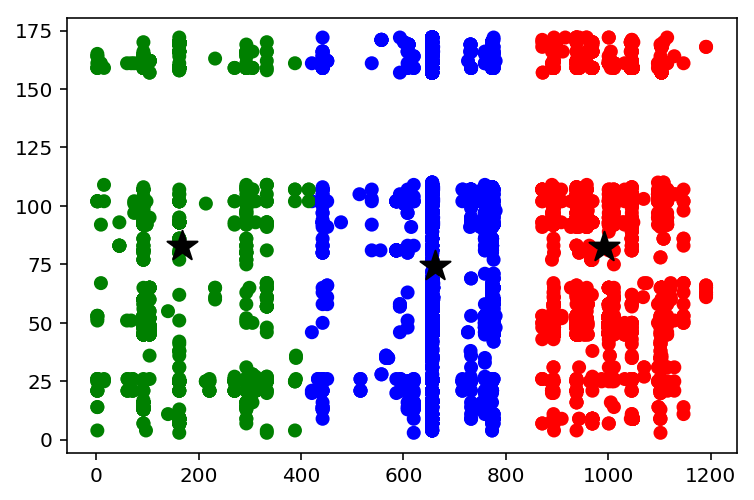

In [20]:
# Create a color map for display better the results
color_map = array(['b','g','r','c','m','y','k', 'g'])

# Display the results
scatter(clustering_data[casid_column], 
        clustering_data[subcategoryid_column], 
        color = color_map[clusters])

# Display the center of each cluster
scatter(kmeans.cluster_centers_[:,0],
        kmeans.cluster_centers_[:,1],
        marker = '*',
        s = 250, # size of the clusters
        color = 'black')

In [ ]:
clusters = KMeans(n_clusters = 10).fit_predict(clustering_data)

In [ ]:
print(unique(clusters))

In [ ]:
unique(data[chemicalname_column][data[casid_column] == casid])[0]

In [ ]:
# Remove 'discontinueddate_column' and 'chemicaldateremoved_column' (and its _Year and _Month columns)
# for the first try with Clustering. Like this, we do not consider that the chemical had been
# removed or the product had been removed from the market
reduced_columns = [ col for col in data_aggregated.columns 
                     if discontinueddate_column not in col and chemicaldateremoved_column not in col ]

# Only the products which continues in the market
data_continued = data_aggregated[data_aggregated[discontinueddate_column + "_Year"] == nat_date.year]
print(data_continued.shape)

# Only the productos which have not a removed chemical
data_no_removed_chemical = data_aggregated[data_aggregated[chemicaldateremoved_column + "_Year"] == nat_date.year]
print(data_no_removed_chemical.shape)